# SVM for classification

Load IRIS dataset, check its contents:


In [5]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target)
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Split data into training and testing parts:

In [6]:
from sklearn.model_selection import train_test_split
X=iris.data
print(X.shape)
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(150, 4)
(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [7]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.9666666666666667

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [19]:
X=iris.data

Plot scatterplots of targets 0 and 1 and check the separability of the classes:

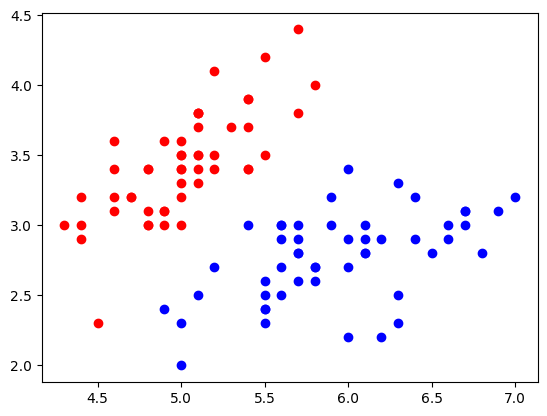

In [32]:
import matplotlib.pyplot as plt
plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='blue')
#plt.scatter(X[y==2,0], X[y==2,1], color='green')

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [31]:
X=iris.data[iris.target != 2, 0:2]
#print(X.shape)
y=iris.target[iris.target != 2]
print(y.shape)
SVMmodel_2 = SVC(kernel='linear') #support model classifier

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X,y,test_size=0.2)
SVMmodel_2.fit(X_train_2, y_train_2)
SVMmodel_2.get_params()
SVMmodel_2.score(X_test_2,y_test_2)


(100,)


1.0

Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

[[4.5 2.3]
 [5.5 3.5]
 [5.7 3.8]
 [5.  3. ]
 [5.8 4. ]
 [5.4 3.4]
 [4.8 3. ]
 [4.9 3. ]
 [5.6 3. ]
 [5.6 2.9]
 [5.7 3. ]
 [6.  3.4]
 [5.9 3.2]
 [4.9 2.4]
 [5.1 2.5]]


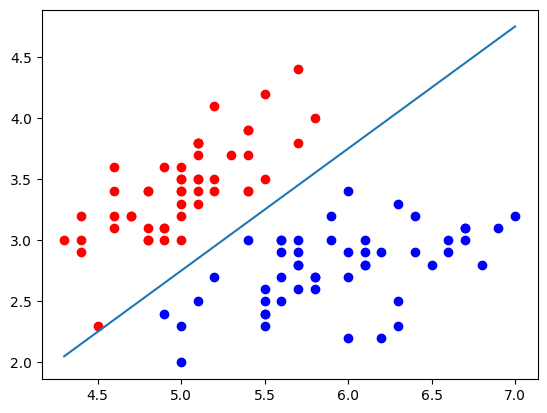

In [51]:
from sklearn.datasets import make_blobs
import numpy as np
supvectors=SVMmodel_2.support_vectors_
# Plot the support vectors here
print(supvectors)
for i in range(size(supvectors)):
  plt.plot(supvectors[:0], supvectors[])

#Separating line coefficients:
W=SVMmodel_2.coef_
b=SVMmodel_2.intercept_

x0 = np.linspace(np.min(X[:,0]), np.max(X[:,0]),2)
x1 = (-b-W[0,0]*x0)/(W[0,1])

plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='blue')
plt.plot(x0, x1)


# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

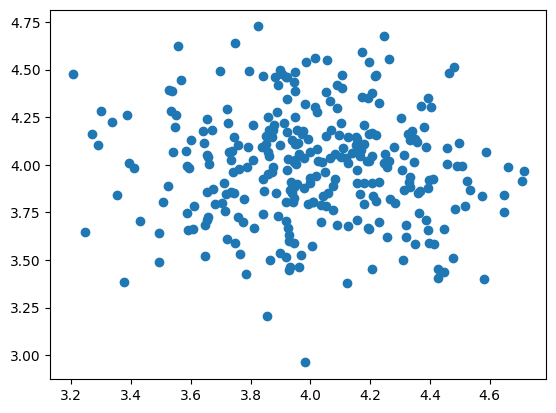

In [52]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



from numpy import quantile, where, randomTrain one-class SVM and plot the outliers (outputs of prediction being equal to -1)

[ 1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1]


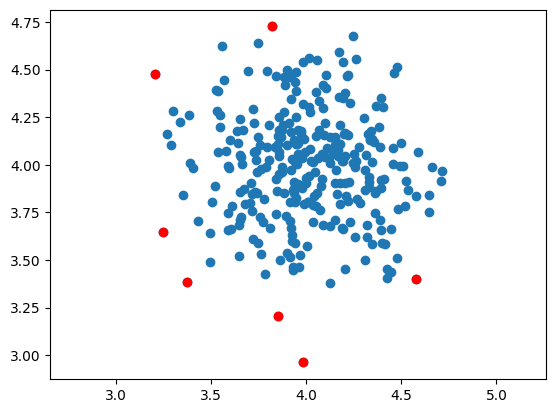

In [59]:
from numpy import quantile, where, random

SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03) #rbf - radial basis function

SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
print(pred)
anom_index = where(pred==-1) #from numpy
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.988604305974063


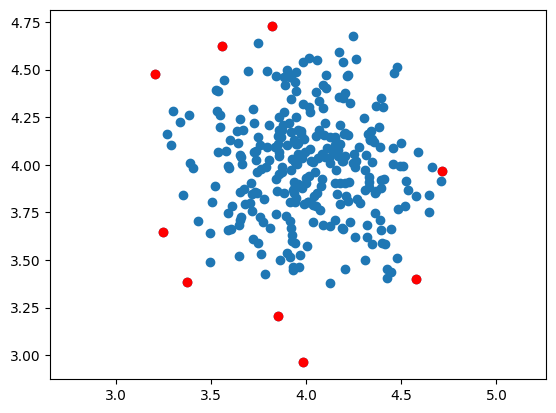

In [64]:
scores = SVMmodelOne.score_samples(x)
#print(scores)

thresh = quantile(scores, 0.03)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()